In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
## Constants
all_patients_csv = '/content/drive/MyDrive/Capstone_GE_DSI_CV_Project/Shared_csv/all_patients.csv'
TEST_SPLIT = 0.2

In [ ]:
# Read CSV file in pandas
df = pd.read_csv(all_patients_csv)
df.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17 12:53:17,MELANOMA,063Y,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17 12:53:45,MELANOMA,063Y,F
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17 12:53:46,MELANOMA,061Y,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17 12:53:48,MELANOMA,061Y,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17 12:53:53,MELANOMA,063Y,F


### Clean data to process

In [ ]:
# Cleaning
to_remove = ['Series UID','Collection', '3rd Party Analysis','Data Description URI','Study UID']
df.drop(columns=to_remove, inplace=True)
# Clean age column
df['age'] = df['age'].map(lambda x : int(x[:-1]) )
# Add another column for flag
df['cancer_flag'] = np.where(df['diagnosis'] == 'NEGATIVE', False, True)

In [ ]:
df.head(3)

,Subject ID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex,cancer_flag
0,PETCT_0011f3deaf,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17 12:53:17,MELANOMA,63,F,True
1,PETCT_0011f3deaf,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17 12:53:45,MELANOMA,63,F,True
2,PETCT_01140d52d8,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17 12:53:46,MELANOMA,61,M,True


### Extract data based on each cancer type

In [ ]:
print(df['diagnosis'].value_counts())

NEGATIVE       1539
MELANOMA        564
LUNG_CANCER     504
LYMPHOMA        435
Name: diagnosis, dtype: int64


In [ ]:
df_lung_cancer = df[df['diagnosis'] == 'NEGATIVE']
df_lung_cancer.to_csv('/content/drive/MyDrive/Capstone_GE_DSI_CV_Project/Shared_csv/negative_patients.csv')

In [ ]:
df_lung_cancer = df[df['diagnosis'] == 'LYMPHOMA']
df_lung_cancer.to_csv('/content/drive/MyDrive/Capstone_GE_DSI_CV_Project/Shared_csv/lymphoma_patients.csv')

In [ ]:
df_lung_cancer = df[df['diagnosis'] == 'MELANOMA']
df_lung_cancer.to_csv('/content/drive/MyDrive/Capstone_GE_DSI_CV_Project/Shared_csv/melanoma_patients.csv')

In [ ]:
df_lung_cancer = df[df['diagnosis'] == 'LUNG_CANCER']
df_lung_cancer.to_csv('/content/drive/MyDrive/Capstone_GE_DSI_CV_Project/Shared_csv/lung_cancer_patients.csv')

### Only get the columns we need

In [ ]:
df2 = df[['Subject ID','age', 'sex','cancer_flag']]
# df2 = df

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
column_to_check = 'Subject ID'

# Find elements that occur more than once
duplicates = df2[df2.duplicated(subset=column_to_check, keep=False)][column_to_check].unique()
print("Duplicates ", len(duplicates))

Duplicates  30


In [ ]:
duplicates_df = df[df['Subject ID'].isin(duplicates)]
duplicates_df.columns

Index(['Subject ID', 'Study Description', 'Study Date', 'Series Description',
       'Manufacturer', 'Modality', 'SOP Class Name', 'SOP Class UID',
       'Number of Images', 'File Size', 'File Location', 'Download Timestamp',
       'diagnosis', 'age', 'sex', 'cancer_flag'],
      dtype='object')

In [ ]:
duplicates_df = duplicates_df[['Subject ID','Study Date', 'age','sex', 'diagnosis','cancer_flag']]

In [ ]:
duplicates_df[duplicates_df['Subject ID'] == 'PETCT_05808cf24e'].sort_values(by='Study Date')

,Subject ID,Study Date,age,sex,diagnosis,cancer_flag
43,PETCT_05808cf24e,3/18/2006,48,M,NEGATIVE,False
45,PETCT_05808cf24e,3/18/2006,48,M,NEGATIVE,False
48,PETCT_05808cf24e,3/18/2006,48,M,NEGATIVE,False
47,PETCT_05808cf24e,7/29/1999,48,M,LYMPHOMA,True
50,PETCT_05808cf24e,7/29/1999,48,M,LYMPHOMA,True
55,PETCT_05808cf24e,7/29/1999,48,M,LYMPHOMA,True


In [ ]:
len(duplicates_df)

216

In [ ]:
## split and save files :
X = df2.drop(columns = ['cancer_flag'])
y = df2['cancer_flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=TEST_SPLIT, random_state=42)

In [ ]:
print("Training data ", len(X_train))
print("Testing data ", len(X_test))

Training data  744
Testing data  186


#### Save the dataset for train test split by merging the columns back

In [ ]:
X_train['cancer_flag'] = y_train
X_train.to_csv("train_subject_data.csv")

X_test['cancer_flag'] = y_test
X_test.to_csv("test_subject_data.csv")

In [ ]:
train_data = X_train.merge(df.drop(columns=['age','sex','diagnosis','cancer_flag']) , how='inner', on='Subject ID')
test_data =  X_test.merge(df.drop(columns=['age','sex','diagnosis','cancer_flag']) , how='inner', on='Subject ID')

train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

### How many patients have cancer and of what type ?  We're only considering if a patient has cancer or not

### How many patients have cancer ? Dataset is balanced

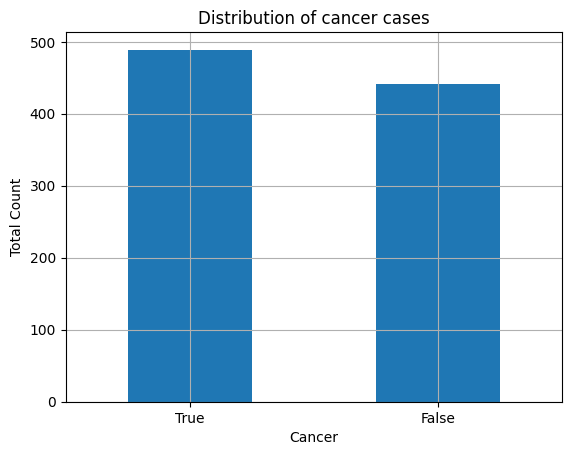

In [ ]:
# df2 = df2
# print(df2['cancer_flag'].value_counts())
(df2['cancer_flag'].value_counts()).plot(kind='bar')

plt.ylabel("Total Count")
plt.xlabel("Cancer")
plt.xticks(rotation=0)
plt.title("Distribution of cancer cases")
plt.grid(True)
plt.show()

### Age distribution of cancer ? Skewed towarads 60

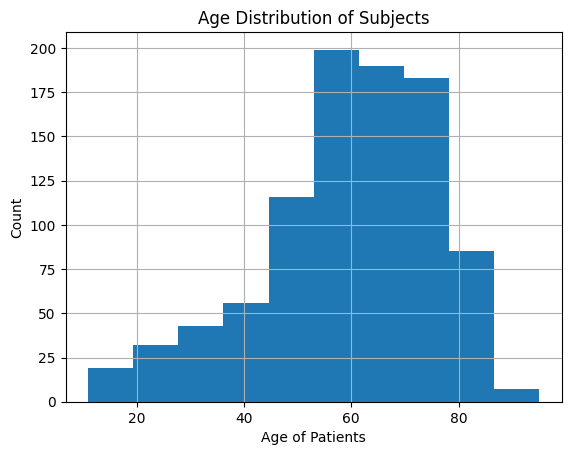

In [ ]:
plt.hist(df2['age'], bins = 10)
plt.xlabel("Age of Patients")
plt.ylabel("Count")
plt.title("Age Distribution of Subjects")
plt.grid(True)
plt.show()



In [ ]:
df2.age.mean()

59.472043010752685

In [ ]:
result = pd.merge(df2, df[['Subject ID', 'diagnosis']], on='Subject ID', how='inner')
result.drop_duplicates(inplace=True)

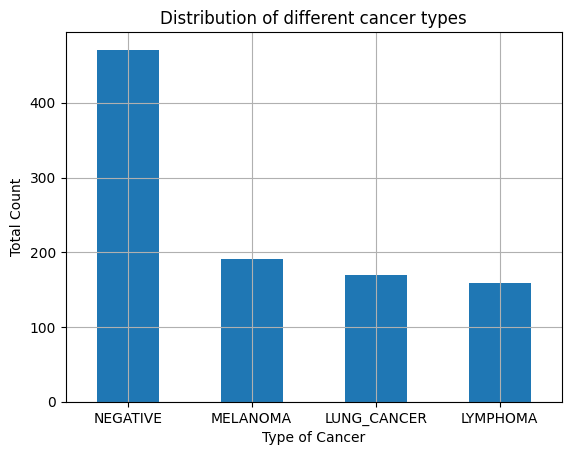

In [ ]:
(result['diagnosis'].value_counts()).plot(kind='bar')
plt.ylabel("Total Count")
plt.xlabel("Type of Cancer")
# plt.xlabel("Count")
plt.title("Distribution of different cancer types")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
grouped = result.groupby(['diagnosis', 'sex']).size().reset_index(name='count')

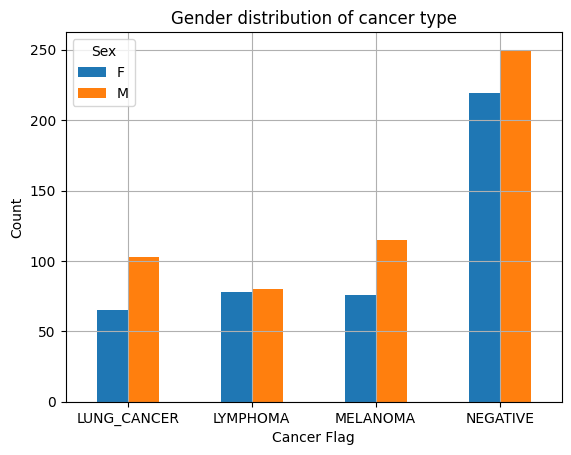

In [ ]:
pivot_table = grouped.pivot(index='diagnosis', columns='sex', values='count').fillna(0)

# Plotting the bar graph
pivot_table.plot(kind='bar', stacked=False)
plt.xlabel('Cancer Flag')
plt.ylabel('Count')
plt.title('Gender distribution of cancer type')
plt.legend(title='Sex')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()